In [1]:
%reload_ext autoreload
%autoreload 2
# check data path
import os, sys
path=os.path.abspath(os.getcwd())
sys.path.append('../driver')
sys.path.append('../../driver')
sys.path.append('../../../messungen')

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
# import fmr_eva as fmr_eva
# import fmr_eva2 as fmr_eva2
# import fmr_read as fmr_read
# import fmr_read2 as fmr_read2

import FMR_Reader_v210208 as FMR_Reader
import FMR_Evaluator_v210208 as FMR_eva
import corporate_design_colors_v3 as cpd

style='../driver/thesis_half'
plt.style.use('%s.mplstyle'%style)

no style found


In [2]:
dataset_up='FH Cobulk30nm up'
d_up=FMR_Reader.read(dataset_up, loc='../../../messungen/')
dataset_down='FH Cobulk30nm down'
d_down=FMR_Reader.read(dataset_down, loc='../../../messungen/')

100%|██████████| 321/321 [00:10<00:00, 30.45it/s]


Initialized with +3T


100%|██████████| 321/321 [00:17<00:00, 18.44it/s]


Initialized with +3T


In [3]:
db_up=FMR_eva.complex_binning(d_up, fmin=2, fmax=10, Hmin=-.11, Hmax=.11)
db_down=FMR_eva.complex_binning(d_down, fmin=2, fmax=10, Hmin=-.11, Hmax=.11)
dn_up=FMR_eva.normS21(db_up, Hnorm='max')
dn_down=FMR_eva.normS21(db_down, Hnorm='max')

<Figure size 3600x2160 with 0 Axes>

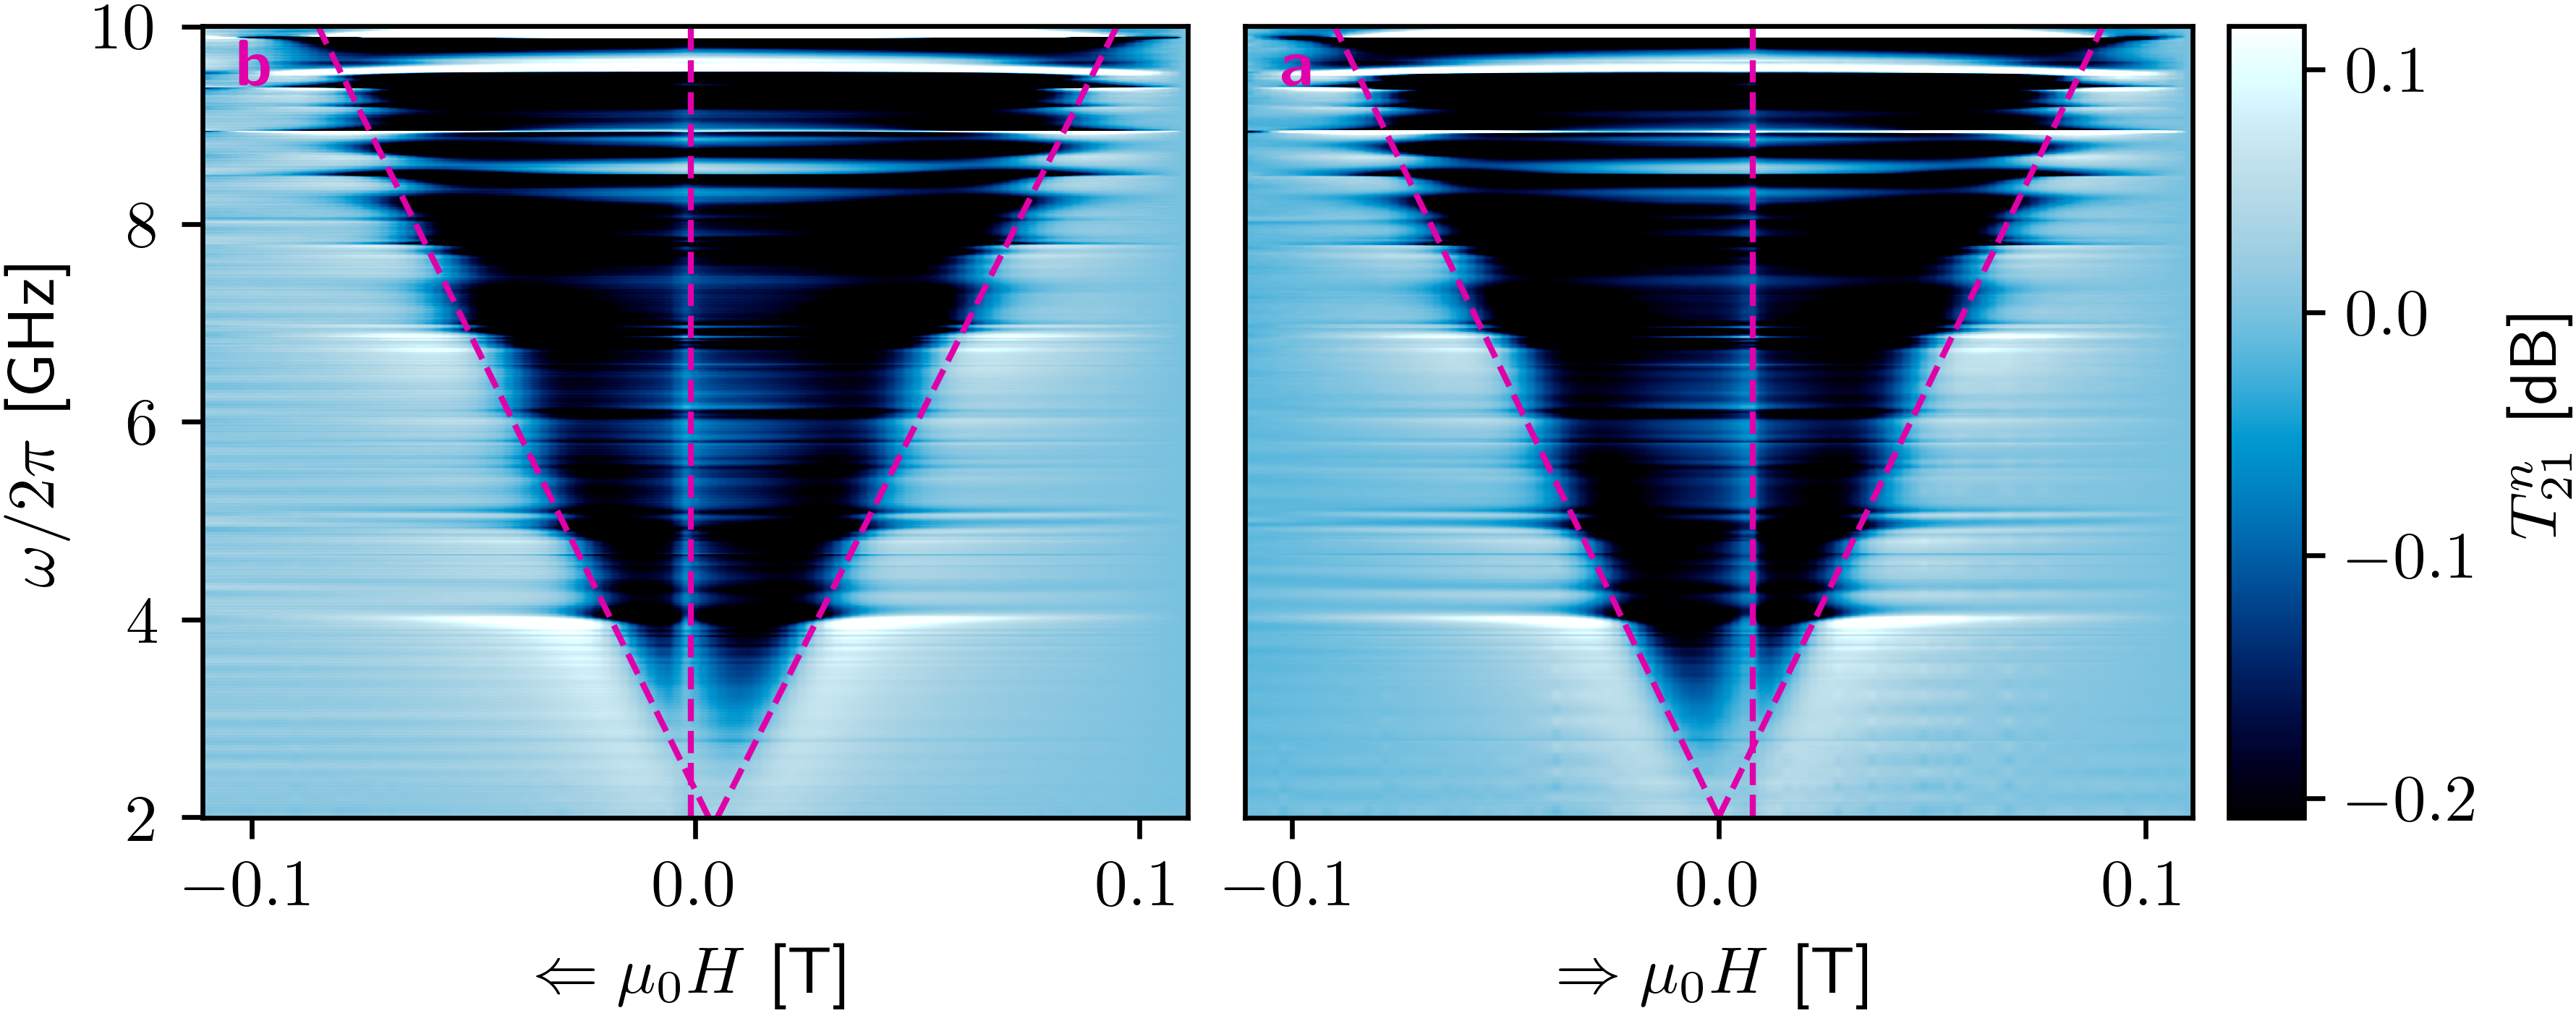

In [5]:
img_up=20*np.log10(np.abs(dn_up['S21']))
img_down=20*np.log10(np.abs(dn_down['S21']))
img=np.concatenate((img_up,img_down))
f=dn_down['f']
H=dn_up['H']

Hlim=(-1.5,1.5)
flim=(0,40)
contrast=1
fig_nr=0

xlabel_up='$\Rightarrow \mu_0H$ [T]'
xlabel_down='$\Leftarrow \mu_0H$ [T]'
ylabel='$\omega/2\pi$ [GHz]'
clabel='$T^n_{21}$ [dB]'

# correct image framing
stepsizeH=np.abs(H[0]-H[1])/2
stepsizef=np.abs(f[-1]-f[-2])/2
Hind=[np.abs(H-Hlim[0]).argmin(),
      np.abs(H-Hlim[1]).argmin()+1]
find=[np.abs(f-flim[0]).argmin(),
      np.abs(f-flim[1]).argmin()+1]
img=img[find[0]:find[1],
        Hind[0]:Hind[1]]
ext=[H[Hind[0]]-stepsizeH,
     H[Hind[1]-1]+stepsizeH,
     f[find[0]]-stepsizef,
     f[find[1]-1]+stepsizef]
f=f[find[0]:find[1]]
H=H[Hind[0]:Hind[1]]

img[img==-np.inf]=np.nan
img[img==np.inf]=np.nan
clim=(np.nanmean(img)-contrast*np.nanstd(img),
      np.nanmean(img)+contrast*np.nanstd(img))


plt.close(fig_nr)
fig=plt.figure(fig_nr)

fig, (ax_img_down, ax_img_up, ax_clb) = plt.subplots(ncols=3,
                                    gridspec_kw={"width_ratios":[2.6,2.5,.2]},
                                                     figsize=(6,2.4),
                                    constrained_layout=True)        
ax_img_up.set_yticks([])
ax_img_up.set_yticklabels([])

im_down = ax_img_down.imshow(img_down, 
                   extent=ext, 
                   aspect='auto',
                   origin='lower',
                   clim=clim,
                   cmap=cpd.images())
ax_img_down.set_xlabel(xlabel_down)
ax_img_down.set_xticks([-.1,.1,0])


ax_img_down.plot([-.001,-.001], [2,10],'--', lw=1, 
             color=cpd.curves(color='magenta')(1))
ax_img_down.plot([0.005, .095], [2,10],'--', lw=1,
             color=cpd.curves(color='magenta')(1))
ax_img_down.plot([0.003, -.085], [2,10],'--', lw=1,
             color=cpd.curves(color='magenta')(1))

im_up = ax_img_up.imshow(img_up, 
                   extent=ext, 
                   aspect='auto',
                   origin='lower',
                   clim=clim,
                   cmap=cpd.images())
ax_img_up.set_xlabel(xlabel_up)
ax_img_up.set_xticks([-.1,.1,0])
ax_img_down.set_ylabel(ylabel)
ax_img_down.set_yticks(np.linspace(2,10,5))


ax_img_up.plot([.008, .008], [2,10],'--', lw=1, 
             color=cpd.curves(color='magenta')(1))
ax_img_up.plot([0, .09], [2,10],'--', lw=1,
             color=cpd.curves(color='magenta')(1))
ax_img_up.plot([-0.00, -.09], [2,10],'--', lw=1,
             color=cpd.curves(color='magenta')(1))

fig.colorbar(im_up,label=clabel, cax=ax_clb)

ax_img_up.annotate(r'\textbf{a}',xy=(0, 1), xycoords='axes fraction',xytext=(50, -100),color=cpd.curves(color='magenta')(1),
                  textcoords='offset pixels',horizontalalignment='left',verticalalignment='bottom')
ax_img_down.annotate(r'\textbf{b}',xy=(0, 1), xycoords='axes fraction',xytext=(50, -100),color=cpd.curves(color='magenta')(1),
                  textcoords='offset pixels',horizontalalignment='left',verticalalignment='bottom')
fig.savefig('hysteresis.pgf')